<a href="https://colab.research.google.com/github/mariorizki-lang/mid-term-machine-learning/blob/main/midterm_regresi_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Cell 1: Instalasi dependensi
!pip install -q gdown scikit-learn

In [3]:
# Cell 2: Memuat dataset
import pandas as pd

# Baca file CSV
reg_df_raw = pd.read_csv('midterm-regresi-dataset.csv', header=None)

# Kolom pertama adalah target, sisanya fitur
reg_df_raw.rename(columns={0: 'year'}, inplace=True)
num_features = reg_df_raw.shape[1] - 1
feature_names = [f'feature_{i}' for i in range(num_features)]
for idx, col in enumerate(feature_names):
    reg_df_raw.rename(columns={idx+1: col}, inplace=True)

reg_df_raw.head()

,year,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35351 entries, 0 to 35350
Data columns (total 91 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        35351 non-null  int64  
 1   feature_0   35351 non-null  float64
 2   feature_1   35351 non-null  float64
 3   feature_2   35351 non-null  float64
 4   feature_3   35351 non-null  float64
 5   feature_4   35351 non-null  float64
 6   feature_5   35351 non-null  float64
 7   feature_6   35351 non-null  float64
 8   feature_7   35351 non-null  float64
 9   feature_8   35351 non-null  float64
 10  feature_9   35351 non-null  float64
 11  feature_10  35351 non-null  float64
 12  feature_11  35351 non-null  float64
 13  feature_12  35351 non-null  float64
 14  feature_13  35351 non-null  float64
 15  feature_14  35351 non-null  float64
 16  feature_15  35351 non-null  float64
 17  feature_16  35351 non-null  float64
 18  feature_17  35351 non-null  float64
 19  feature_18  35351 non-nul

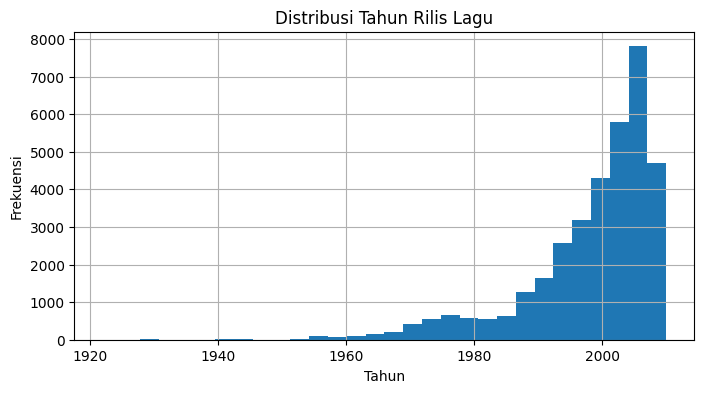

Missing values tertinggi:
feature_83    0.002829
feature_84    0.002829
feature_85    0.002829
feature_78    0.002829
feature_79    0.002829
feature_80    0.002829
feature_81    0.002829
feature_89    0.002829
feature_88    0.002829
feature_87    0.002829
dtype: float64


In [6]:

# Cell 3: Analisis Data Eksploratif

# Informasi dataset
print(reg_df_raw.info())

# Statistik deskriptif untuk target dan beberapa fitur
print("Statistik deskriptif target dan beberapa fitur:")
print(reg_df_raw[['year'] + feature_names[:5]].describe().transpose())

# Distribusi tahun rilis
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
reg_df_raw['year'].hist(bins=30)
plt.title('Distribusi Tahun Rilis Lagu')
plt.xlabel('Tahun')
plt.ylabel('Frekuensi')
plt.show()

# Missing values
missing_pct = reg_df_raw.isnull().mean().sort_values(ascending=False) * 100
print("Missing values tertinggi:")
print(missing_pct.head(10))


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Pisahkan fitur dan target
X = reg_df_raw[feature_names]
y = reg_df_raw['year']

# Kolom numerik (semua fitur)
numeric_cols = X.columns

# Preprocessor: imputasi median lalu scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_cols)
    ]
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
import os
file_size_bytes = os.path.getsize(file_path)
file_size_mb = file_size_bytes / (1024 ** 2)

print(f"Ukuran file: {file_size_bytes:,} bytes")
print(f"Ukuran file: {file_size_mb:.2f} MB")  #ukuran 422.88 MB, deadline 2 minggu. ngerjain mepet pasti ga kelar :))))

Ukuran file: 443,423,087 bytes
Ukuran file: 422.88 MB


In [9]:

# Cell 5: Melatih model konvensional
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Pipeline Linear Regression
lin_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

lin_reg.fit(X_train, y_train)

# Prediksi
y_pred_lin = lin_reg.predict(X_test)

# Evaluasi
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print('Linear Regression:')
print('MSE :', mse_lin)
print('RMSE:', rmse_lin)
print('MAE :', mae_lin)
print('R²  :', r2_lin)

# Pipeline Ridge Regression (default alpha=1.0)
ridge_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

ridge_reg.fit(X_train, y_train)

# Prediksi
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluasi
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print('Ridge Regression (alpha=1.0):')
print('MSE :', mse_ridge)
print('RMSE:', rmse_ridge)
print('MAE :', mae_ridge)
print('R²  :', r2_ridge)

Linear Regression:
MSE : 86.70347117297197
RMSE: 9.311469871774916
MAE : 6.626092361983751
R²  : 0.21703961083525747
Ridge Regression (alpha=1.0):
MSE : 86.70338467667641
RMSE: 9.311465227163575
MAE : 6.626105099084632
R²  : 0.21704039192478397


In [11]:
# Cell 6: Hyperparameter tuning untuk Ridge Regression
from sklearn.model_selection import GridSearchCV

# Grid search untuk alpha parameter
param_grid = {
    'model__alpha': [0.1, 1.0, 10.0, 100.0]
}

ridge_grid_search = GridSearchCV(
    estimator=Pipeline(steps=[('preprocessor', preprocessor), ('model', Ridge())]),
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

ridge_grid_search.fit(X_train, y_train)

print('Best alpha:', ridge_grid_search.best_params_)
print('Best CV RMSE:', -ridge_grid_search.best_score_)

# Gunakan best model
best_ridge_model = ridge_grid_search.best_estimator_

# Evaluasi di test set
best_ridge_pred = best_ridge_model.predict(X_test)

mse_best = mean_squared_error(y_test, best_ridge_pred)
rmse_best = np.sqrt(mse_best)
mae_best = mean_absolute_error(y_test, best_ridge_pred)
r2_best = r2_score(y_test, best_ridge_pred)

print('Tuned Ridge Regression:')
print('MSE :', mse_best)
print('RMSE:', rmse_best)
print('MAE :', mae_best)
print('R²  :', r2_best)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best alpha: {'model__alpha': 100.0}
Best CV RMSE: 9.240826014022238
Tuned Ridge Regression:
MSE : 86.69803588364253
RMSE: 9.311178007300823
MAE : 6.627453709113914
R²  : 0.21708869325596147
